# Required Python Modules & Imports
Python imports required to train the neural network on the MNIST dataset

In [ ]:
#Required mathematical & base imports
import numpy as np
import os
from tensorflow import keras
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
#Neural networks and dataset imports
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

# Loading the MNIST dataset from the Keras import, and assigning them to variables

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
#Printing the initial shape of the MNIST dataset before normalizing them into a shape usable in our neural network training, originally the dataset has 28x28 images.print("X_train shape", X_train.shape)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
#Reshaping the dataset and type into a normalized input vector with a size of 784 for use in the neural network, and making the type into a float32.
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Regularizing the pixel values in the train and test datasets since the maximum value of a grayscale pixel is 255, this practically turns values from a range of [0, 255] to a range of [0, 1].
X_train /= 255
X_test /= 255
#Printing the finalized shape of the dataset after reshaping.
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
#One-hot encoding the values, which is a method in which class labels are converted into binary vectors, each value in the vector is 0 with the exception of the element matching the correct class.
#Using the n_classes = 10 allows this to match the input data (MNIST digit) which has 10 classes (digits going from 0 - 9)
n_classes = 10
print("Pre one-hot encoding shape: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Post one-hot encoding shape: ", Y_train.shape)

Pre one-hot encoding shape:  (60000,)
Post one-hot encoding shape:  (60000, 10)


# Building a fully connected multi-layer network to classify the data we provided and normalized.


In [ ]:
model = Sequential()
#L1, layer with 128 neurons and takes the input shape of 784 (which is the shape of the data we normalized earlier, a 28x28 image flattened)
model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
#L2, layer with again 128 neurons that takes the output of the previous layer and outputs a new value for the next layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.4))
#L3, final layer with 128 neurons that outputs a new value and gives it to the final layer for the classification
model.add(Dense(128))
model.add(Activation('relu'))

#L4, final layer with 10 neurons matching the 10 inputs possible with mnist digit (0-9), this is the layer that classifies the input after it goes through the previous 3 layers
model.add(Dense(10))
model.add(Activation('softmax'))

# Compiling the model post creation.


In [ ]:
#Compiling the model after creation, using the adam optimizer and categorical crossentropy.
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

#Categorical crossentropy is a common loss function used when it comes to multi-classification problems, it measures the difference between predicted and real probabilities and attempts to minimize the loss during training
#Adam is an algorithm that automatically adapts the learning rate based on the gradient of the loss function, constantly adjusting weights and biases during training to achieve optimal results.

# Model training using a large batch size and 7 epochs

In [ ]:
m1 = model.fit(X_train, Y_train,
          batch_size=512, epochs=7,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/7
118/118 - 3s - loss: 0.8074 - accuracy: 0.7417 - val_loss: 0.2575 - val_accuracy: 0.9225 - 3s/epoch - 28ms/step
Epoch 2/7
118/118 - 2s - loss: 0.3378 - accuracy: 0.8996 - val_loss: 0.1839 - val_accuracy: 0.9443 - 2s/epoch - 15ms/step
Epoch 3/7
118/118 - 1s - loss: 0.2627 - accuracy: 0.9222 - val_loss: 0.1499 - val_accuracy: 0.9537 - 1s/epoch - 12ms/step
Epoch 4/7
118/118 - 1s - loss: 0.2226 - accuracy: 0.9342 - val_loss: 0.1304 - val_accuracy: 0.9608 - 1s/epoch - 12ms/step
Epoch 5/7
118/118 - 1s - loss: 0.1970 - accuracy: 0.9423 - val_loss: 0.1181 - val_accuracy: 0.9645 - 1s/epoch - 12ms/step
Epoch 6/7
118/118 - 1s - loss: 0.1773 - accuracy: 0.9476 - val_loss: 0.1071 - val_accuracy: 0.9681 - 1s/epoch - 12ms/step
Epoch 7/7
118/118 - 1s - loss: 0.1617 - accuracy: 0.9515 - val_loss: 0.1119 - val_accuracy: 0.9688 - 1s/epoch - 12ms/step


#Summarizing the model into an image file, and showing all the information about layers and data

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 activation_4 (Activation)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               16512     
                                                                 
 activation_5 (Activation)   (None, 128)               0         
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

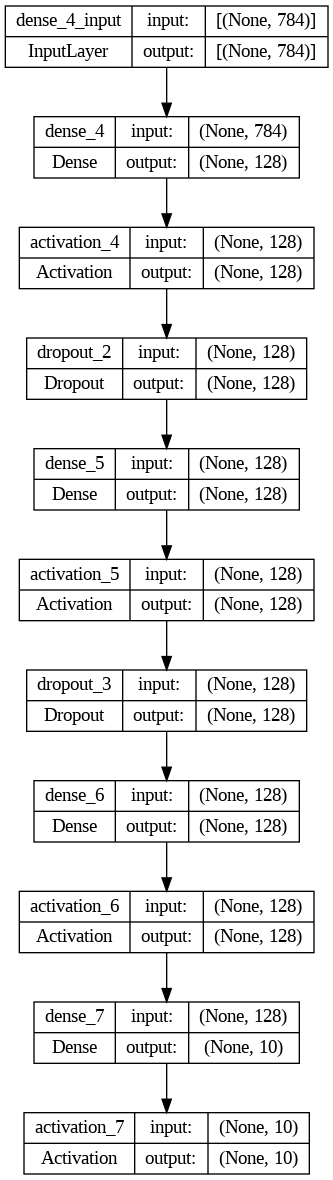

In [ ]:
model.summary()
keras.utils.plot_model(model, to_file='finalmnist.png', show_shapes=True, show_layer_names=True)

In [ ]:
save_dir = "/results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
mnist_model = load_model('/results/keras_mnist.h5')
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.1119 - accuracy: 0.9688 - 660ms/epoch - 2ms/step
Test Loss 0.1118854507803917
Test Accuracy 0.9688000082969666


#Creating the Confusion Matrix and printing it out

313/313 [==============================] - 1s 2ms/step


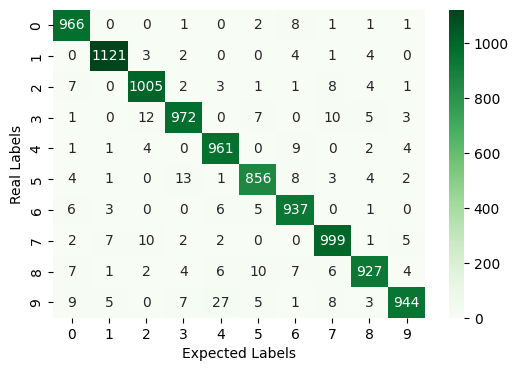

In [ ]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
Y_test_labels = np.argmax(Y_test, axis=1)
plt.figure(figsize=(6, 4))
confusion_matrix = tf.math.confusion_matrix(Y_test_labels, y_pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Expected Labels')
plt.ylabel('Real Labels')
plt.show()

#Creating Accuracy and Loss Figures

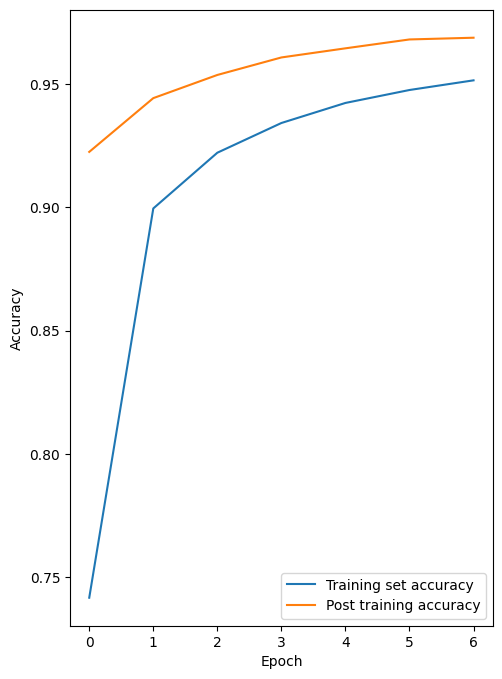

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(m1.history['accuracy'], label='Training set accuracy')
plt.plot(m1.history['val_accuracy'], label='Post training accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()